# Chronic Kidney Disease | Naive Bayes

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
kidney_df = pd.read_csv('new_model.csv' )

In [23]:
kidney_df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [24]:
kidney_df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [25]:
kidney_df.nunique()

Bp        11
Sg         5
Al         6
Su         6
Rbc        2
Bu       118
Sc        85
Sod       35
Pot       41
Hemo     116
Wbcc      90
Rbcc      46
Htn        3
Class      2
dtype: int64

In [26]:
df_duplicates = kidney_df[kidney_df.duplicated()]
df_duplicates.shape[0]

0

In [27]:
kidney_df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

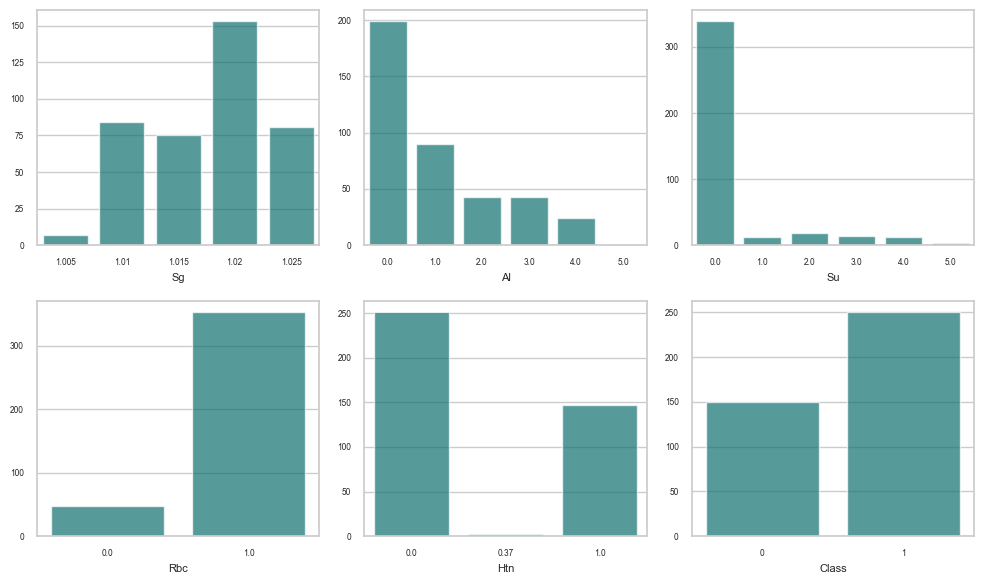

In [28]:
categorical_columns = ['Sg', 'Al', 'Su', 'Rbc', 'Htn', 'Class']

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
for i, cat_var in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=kidney_df, x=cat_var, color='Teal', alpha=0.7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(cat_var, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

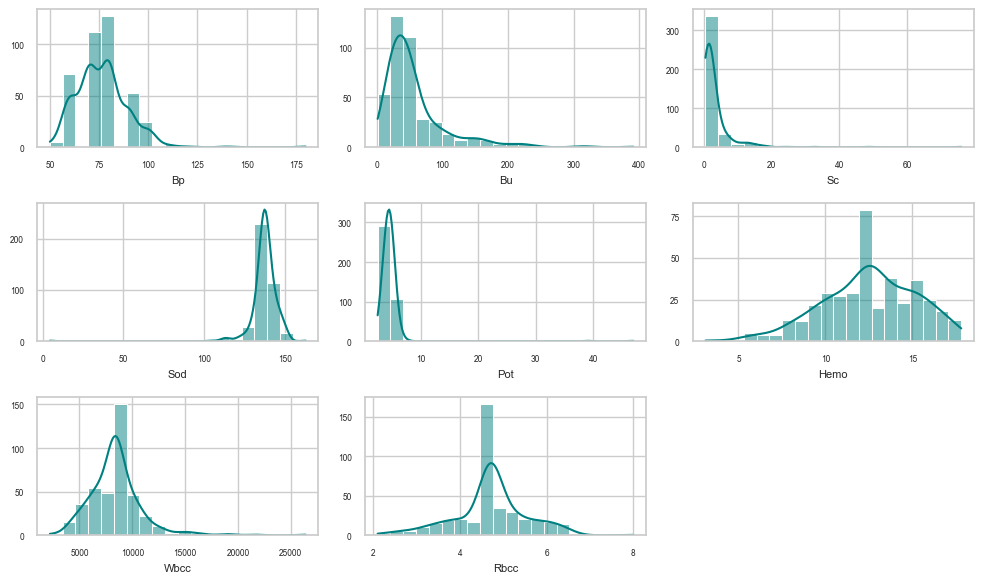

In [29]:
numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=kidney_df, x=var, kde=True, bins=20, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()
    

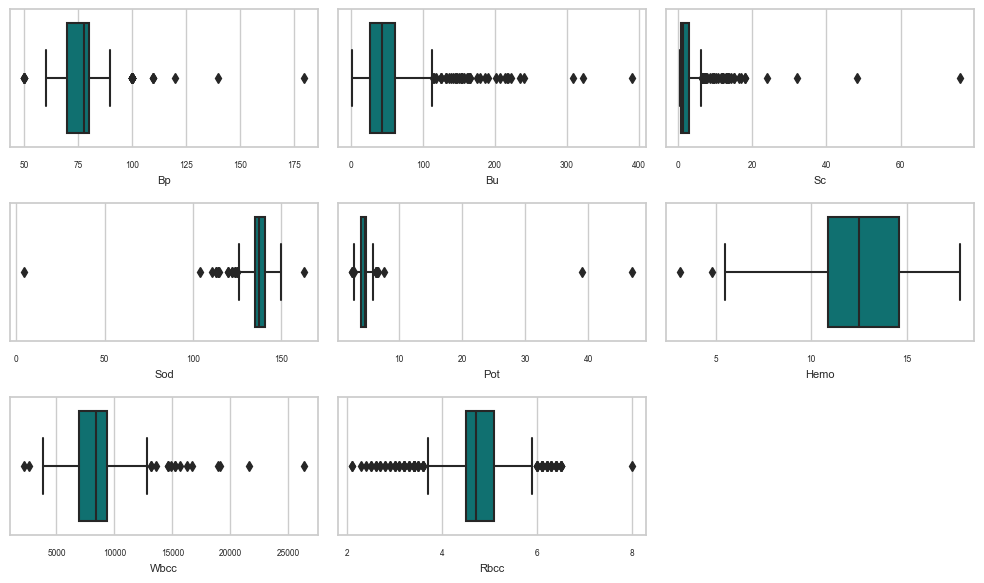

In [30]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=kidney_df, x=var, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

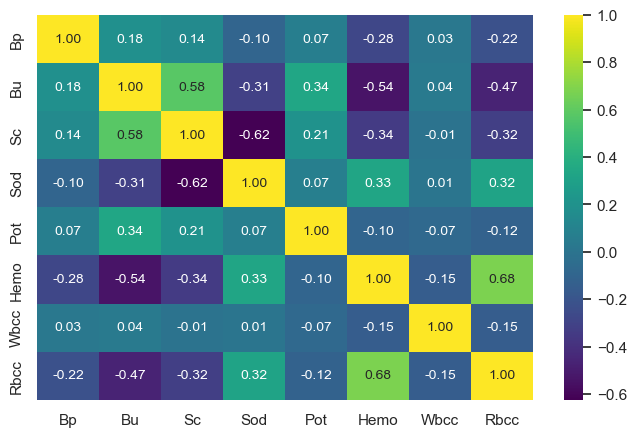

In [31]:
corr_df = kidney_df[['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']]
corr_matrix = corr_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')
plt.show()

In [32]:

categorical_df = pd.DataFrame()
bins = 5

for column in numerical_columns:
    transformed_data = pd.cut(kidney_df[column], bins=bins, labels=False)
    categorical_df[f'{column}_c'] = transformed_data
    
kidney_df = pd.concat([kidney_df, categorical_df], axis=1)
kidney_df.drop(columns=numerical_columns, inplace=True)

In [33]:
kidney_df.head()

,Sg,Al,Su,Rbc,Htn,Class,Bp_c,Bu_c,Sc_c,Sod_c,Pot_c,Hemo_c,Wbcc_c,Rbcc_c
0,1.020,1.0,0.0,1.0,1.0,1,1,0,0,4,0,4,1,2
1,1.020,4.0,0.0,1.0,0.0,1,0,0,0,4,0,2,0,2
2,1.010,2.0,3.0,1.0,0.0,1,1,0,0,4,0,2,1,2
3,1.005,4.0,0.0,1.0,1.0,1,0,0,0,3,0,2,0,1
4,1.010,2.0,0.0,1.0,0.0,1,1,0,0,4,0,2,1,2


In [34]:
kidney_df['Class'].value_counts()

Class
1    250
0    150
Name: count, dtype: int64

In [35]:
target = kidney_df['Class']
X_train, X_test, y_train, y_test = train_test_split(kidney_df.drop('Class', axis=1), target, test_size=0.3, random_state=42)

In [36]:
categorical_nb = CategoricalNB()
model=categorical_nb.fit(X_train,y_train)
y_pred = categorical_nb.predict(X_test)

In [37]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metrics':['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values' :[accuracy, precision, recall, f1]
})
metrics_df

,Metrics,Values
0,Accuracy,0.958333
1,Precision,0.986301
2,Recall,0.947368
3,F1,0.966443


In [38]:
sns.reset_orig() 
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categorical_nb.classes_).plot()

In [39]:
import pickle
with open('chr.pkl','wb') as kidney_df:
    pickle.dump(model, kidney_df)